In [5]:
# load libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt

### Initial data check

In [6]:
# import data
df_campfin = pd.read_csv('data/Campaign_Finance_20260204.csv')

In [7]:
df_campfin.head()

,ID,Record ID,Report ID,File Link,First Name,Last Name,Business Name,Contact Type,Record Type,Amount,Schedule Type,Candidate Name,Election Date,Transaction Date,Street,City,State,Zipcode,Geo Location
0,FR12995,2995,2995,https://campfin.dallascityhall.com/FinalReport...,Carolyn,Arnold,NaN,Candidate / Committee,January 15: Semi-Annual 2026,0.0,Report,Carolyn Arnold,NaN,01/15/2026 05:54:31 PM,835 Timber Dell Lane,Dallas,TX,75232,835 Timber Dell Lane Dallas TX 75232 (32.67779...
1,FR12999,2999,2999,https://campfin.dallascityhall.com/FinalReport...,Zarin,Gracey,NaN,Candidate / Committee,January 15: Semi-Annual 2026,0.0,Report,Zarin Gracey,NaN,01/15/2026 04:48:27 PM,PO Box 763173,Dallas,TX,75376,763173 Dallas TX 75376
2,FR12998,2998,2998,https://campfin.dallascityhall.com/FinalReport...,Jaime,Resendez,NaN,Candidate / Committee,January 15: Semi-Annual 2026,0.0,Report,Jaime Resendez,05/03/2025 12:00:00 AM,01/15/2026 04:30:46 PM,1458 Mission Hills Ln,Dallas,TX,75217,1458 Mission Hills Ln Dallas TX 75217 (32.7379...
3,FR12997,2997,2997,https://campfin.dallascityhall.com/FinalReport...,Monica R,Alonzo,NaN,Candidate / Committee,January 15: Semi-Annual 2026,0.0,Report,Monica R Alonzo,05/03/2025 12:00:00 AM,01/15/2026 04:21:23 PM,PO Box 4126,Dallas,TX,75208,"4126 Dallas TX 75208 (33.11273, -96.82308)"
4,FR12992,2992,2992,https://campfin.dallascityhall.com/FinalReport...,Jesus,Moreno,NaN,Candidate / Committee,January 15: Semi-Annual 2026,0.0,Report,Jesus Moreno,11/01/2027 12:00:00 AM,01/15/2026 04:21:19 PM,4809 Victor St,Dallas,TX,75246,"4809 Victor St Dallas TX 75246 (32.79619, -96...."


In [8]:
df_campfin.tail()

,ID,Record ID,Report ID,File Link,First Name,Last Name,Business Name,Contact Type,Record Type,Amount,Schedule Type,Candidate Name,Election Date,Transaction Date,Street,City,State,Zipcode,Geo Location
9945,F45852,45852,2735,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,Sams Club,Expenditure,July 15: Semi-Annual 2024,41.77,Political Expenditures,Tennell Atkins,NaN,01/02/2024 12:00:00 AM,2900 W Wheatland Rd,Dallas,TX,75237,"2900 W Wheatland Rd Dallas TX 75237 (32.64542,..."
9946,F46381,46381,2754,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,Square Space,Expenditure,July 15: Semi-Annual 2024,6.50,Political Expenditures,Jesus Moreno,05/06/2023 12:00:00 AM,01/02/2024 12:00:00 AM,1455 Main St,San Francisco,CA,94104,1455 Main St San Francisco CA 94104
9947,F46358,46358,2746,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,MAILCHIMP,Expenditure,July 15: Semi-Annual 2024,117.26,Political Expenditures,Paula Blackmon,05/03/2025 12:00:00 AM,01/02/2024 12:00:00 AM,405 N Angier Ave NE,Atlanta,GA,30308,405 N Angier Ave NE Atlanta GA 30308 (33.76966...
9948,F45906,45906,2735,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,Jefferson Monument,Expenditure,July 15: Semi-Annual 2024,350.00,Political Expenditures,Tennell Atkins,NaN,01/02/2024 12:00:00 AM,351 Jefferson,Dallas,TX,75208,"351 Jefferson Dallas TX 75208 (32.74318, -96.8..."
9949,F46362,46362,2756,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,SiteGround Hosting,Expenditure,July 15: Semi-Annual 2024,19.99,Political Expenditures,Jaime Resendez,05/06/2023 12:00:00 AM,01/01/2024 12:00:00 AM,14455 n Hayden Rd,Scottsdale,AR,85260,14455 n Hayden Rd Scottsdale AR 85260 (33.6185...


In [9]:
# how many rows in the dataset?
len(df_campfin)

9950

In [10]:
# each row has a unique ID
df_campfin['ID'].nunique()

9950

In [11]:
# nas in the first name, last name and business name columns make sense, since donors will either be individuals or businesses
df_campfin.isnull().sum()

ID                     0
Record ID              0
Report ID              0
File Link              0
First Name          4005
Last Name           4006
Business Name       5682
Contact Type           0
Record Type            0
Amount                 0
Schedule Type          0
Candidate Name         0
Election Date       1050
Transaction Date       0
Street                 0
City                   0
State                  0
Zipcode                0
Geo Location           0
dtype: int64

In [12]:
# check data types -- we want to convert the transaction date and election date to datetime objects
df_campfin.dtypes

ID                      str
Record ID             int64
Report ID             int64
File Link               str
First Name              str
Last Name               str
Business Name           str
Contact Type            str
Record Type             str
Amount              float64
Schedule Type           str
Candidate Name          str
Election Date           str
Transaction Date        str
Street                  str
City                    str
State                   str
Zipcode                 str
Geo Location            str
dtype: object

In [13]:
# change date columns to datetime
df_campfin['Transaction Date'] = pd.to_datetime(df_campfin['Transaction Date'], errors='coerce')
df_campfin['Election Date'] = pd.to_datetime(df_campfin['Election Date'], errors='coerce')


/var/folders/sv/fm7yfyrs7317lzyxf_8p39800000gn/T/ipykernel_74466/1085802198.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_campfin['Transaction Date'] = pd.to_datetime(df_campfin['Transaction Date'], errors='coerce')
/var/folders/sv/fm7yfyrs7317lzyxf_8p39800000gn/T/ipykernel_74466/1085802198.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_campfin['Election Date'] = pd.to_datetime(df_campfin['Election Date'], errors='coerce')


In [14]:
df_campfin.dtypes

ID                             str
Record ID                    int64
Report ID                    int64
File Link                      str
First Name                     str
Last Name                      str
Business Name                  str
Contact Type                   str
Record Type                    str
Amount                     float64
Schedule Type                  str
Candidate Name                 str
Election Date       datetime64[us]
Transaction Date    datetime64[us]
Street                         str
City                           str
State                          str
Zipcode                        str
Geo Location                   str
dtype: object

In [15]:
# earliest and latest election dates - 2019 election (Dallas mayoral?) to 2024 election
print(df_campfin['Election Date'].min())
print(df_campfin['Election Date'].max())

2019-05-04 00:00:00
2027-11-07 00:00:00


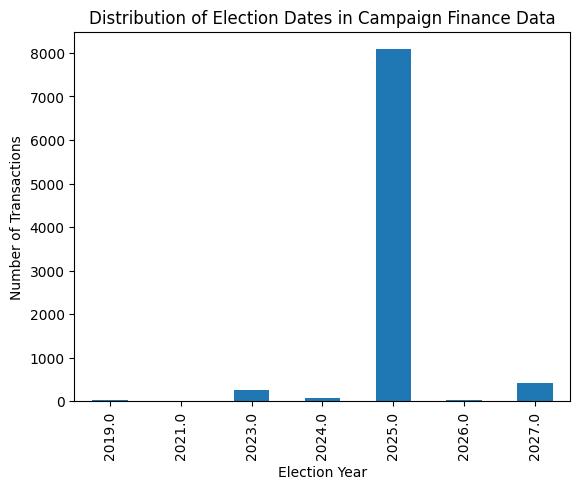

In [ ]:
# distribution of election dates
df_campfin['Election Date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Election Year')
plt.ylabel('Transactions')
plt.title('Election Dates')
plt.show()

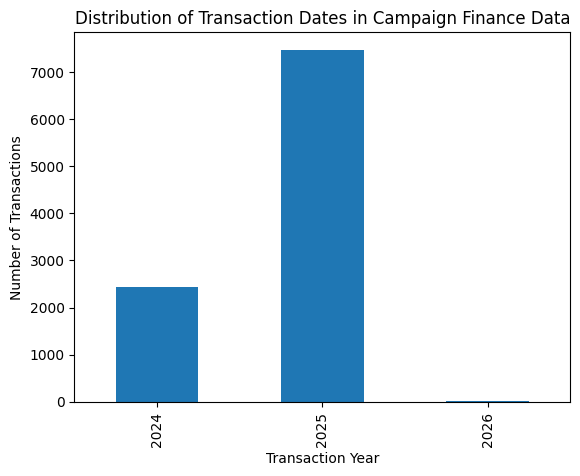

In [ ]:
# distribution of transaction dates
df_campfin['Transaction Date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Transaction Year')
plt.ylabel('Transactions')
plt.title('Transaction Dates')
plt.show()

In [ ]:
# seeing the same thing i noticed on the website itself: there are transactions from 3-4 years after the election date, which seems weird
transaction_post_election = df_campfin[df_campfin['Transaction Date'] > df_campfin['Election Date']].sort_values(by='Election Date')
transaction_post_election[['Transaction Date', 'Election Date']].head()

,Transaction Date,Election Date
8573,2024-09-23,2019-05-04
9873,2024-01-25,2019-05-04
8666,2024-09-05,2019-05-04
9288,2024-05-14,2019-05-04
9293,2024-05-14,2019-05-04


In [83]:
# how many unique elections, and what are they
df_campfin['Election Date'].nunique()
df_campfin['Election Date'].unique()

<DatetimeArray>
[                'NaT', '2025-05-03 00:00:00', '2027-11-01 00:00:00',
 '2027-11-07 00:00:00', '2026-05-02 00:00:00', '2023-05-06 00:00:00',
 '2027-11-02 00:00:00', '2025-06-07 00:00:00', '2027-05-01 00:00:00',
 '2025-05-05 00:00:00', '2025-05-10 00:00:00', '2025-04-30 00:00:00',
 '2021-05-01 00:00:00', '2024-05-03 00:00:00', '2019-05-04 00:00:00',
 '2024-05-10 00:00:00', '2025-06-01 00:00:00']
Length: 17, dtype: datetime64[us]

In [84]:
# basic statistics 
df_campfin.describe()

,Record ID,Report ID,Amount,Election Date,Transaction Date
count,9950.000000,9950.000000,9950.000000,8900,9950
mean,69462.849648,2863.928643,587.842293,2025-05-18 14:07:29.797752,2025-02-14 09:44:05.881306
min,105.000000,2732.000000,0.000000,2019-05-04 00:00:00,2024-01-01 00:00:00
25%,48057.250000,2810.000000,54.610000,2025-05-03 00:00:00,2025-01-03 00:00:00
50%,88368.000000,2846.000000,173.115000,2025-05-03 00:00:00,2025-03-18 05:59:15
75%,92128.750000,2938.000000,500.000000,2025-05-03 00:00:00,2025-04-26 00:00:00
max,95319.000000,2999.000000,76000.000000,2027-11-07 00:00:00,2026-01-15 17:54:31
std,25634.987485,75.420379,2037.281922,NaN,NaN


In [ ]:
# the minimum is zero dollars but that's because this includes reports
df_campfin[df_campfin['Amount'] == 0].groupby('Schedule Type').size()

Schedule Type
Notice From Political Committees     10
Political Expenditures                1
Report                              191
Report Itself                         3
dtype: int64

In [86]:
zero_dollars = df_campfin[df_campfin['Amount'] == 0]
print(f"Number of entries with zero dollar amounts: {len(zero_dollars)}")

Number of entries with zero dollar amounts: 205


In [87]:
# most of the $0 entries are candidate/committee contact type
zero_dollars['Contact Type'].value_counts()

Contact Type
Candidate / Committee    191
Expenditure               11
Report Itself              3
Name: count, dtype: int64

In [88]:
# check for duplicate rows
num_duplicates = df_campfin.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [89]:
# check distribution of key categorical variables
print(f"Unique candidates: {df_campfin['Candidate Name'].nunique()}")
print("\nRecord types:")
print(df_campfin['Record Type'].value_counts())
print("\nSchedule types:")
print(df_campfin['Schedule Type'].value_counts())

Unique candidates: 70

Record types:
Record Type
30th Day Before General Election 2025    2767
July 15: Semi-Annual 2025                1739
8th Day Before General Election 2025     1628
January 15: Semi-Annual 2025             1538
July 15: Semi-Annual 2024                 935
January 15: Semi-Annual 2026              713
8th Day Before Runoff Election 2025       552
Final Report (COH)                         78
Name: count, dtype: int64

Schedule types:
Schedule Type
Political Contributions Other Than Pledges Or Loans             5298
Political Expenditures                                          4016
Report Itself                                                    202
Report                                                           191
Political Expenditures Made From Personal Funds                  130
Loans                                                             55
Credits                                                           46
Notice From Political Committees           

### Exploration

In [90]:
# let's make a column that indicates whether the donor is a person or a business
def donor_type(row):
    if pd.notnull(row['Business Name']):
        return 'Business'
    elif pd.notnull(row['First Name']) and pd.notnull(row['Last Name']):
        return 'Individual'
    else:
        return 'Unknown'
    
df_campfin['Donor Type'] = df_campfin.apply(donor_type, axis=1)

In [91]:
# list council members
# add option for both william roth and bill roth, gay donnell willis and donnell willis
city_council_members = ["Eric Johnson", "Chad West", "Jesse Moreno", "Zarin Gracey", "Maxie Johnson", "Jaime Resendez", "Laura Cadena", "Adam Bazaldua", "Lorie Blair", "Paula Blackmon", "Kathy Stewart", "William Roth", "Bill Roth", "Cara Mendelsohn", "Gay Donnell Willis", "Gay Willis", "Paul Ridley"]
len(city_council_members)

17

In [92]:
# look for only city council members
df_council = df_campfin[df_campfin['Candidate Name'].isin(city_council_members)]
df_council.head()

,ID,Record ID,Report ID,File Link,First Name,Last Name,Business Name,Contact Type,Record Type,Amount,Schedule Type,Candidate Name,Election Date,Transaction Date,Street,City,State,Zipcode,Geo Location,Donor Type
1,FR12999,2999,2999,https://campfin.dallascityhall.com/FinalReport...,Zarin,Gracey,NaN,Candidate / Committee,January 15: Semi-Annual 2026,0.0,Report,Zarin Gracey,NaT,2026-01-15 16:48:27,PO Box 763173,Dallas,TX,75376,763173 Dallas TX 75376,Individual
2,FR12998,2998,2998,https://campfin.dallascityhall.com/FinalReport...,Jaime,Resendez,NaN,Candidate / Committee,January 15: Semi-Annual 2026,0.0,Report,Jaime Resendez,2025-05-03,2026-01-15 16:30:46,1458 Mission Hills Ln,Dallas,TX,75217,1458 Mission Hills Ln Dallas TX 75217 (32.7379...,Individual
5,FR12983,2983,2983,https://campfin.dallascityhall.com/FinalReport...,Gay,Willis,NaN,Candidate / Committee,January 15: Semi-Annual 2026,0.0,Report,Gay Willis,2027-11-07,2026-01-15 16:13:43,4728 Mill Run Road,Dallas,TX,75244,"4728 Mill Run Road Dallas TX 75244 (32.92416, ...",Individual
6,FR12993,2993,2993,https://campfin.dallascityhall.com/FinalReport...,Laura,Cadena,NaN,Candidate / Committee,January 15: Semi-Annual 2026,0.0,Report,Laura Cadena,2025-05-03,2026-01-15 14:55:41,1010 Singleton,Dallas,TX,75212,"1010 Singleton Dallas TX 75212 (32.77852, -96....",Individual
7,FR12996,2996,2996,https://campfin.dallascityhall.com/FinalReport...,Adam,Bazaldua,NaN,Candidate / Committee,January 15: Semi-Annual 2026,0.0,Report,Adam Bazaldua,2026-05-02,2026-01-15 14:02:57,0 0,Dallas,TX,75357,0 0 Dallas TX 75357,Individual


In [93]:
# how many unique council members -- 12
df_council['Candidate Name'].unique()
# see who is missing from city_council_members 
council_in_data = set(df_council['Candidate Name'].unique())
missing_members = [member for member in city_council_members if member not in council_in_data]
print(missing_members)

# gay donnell willis --> gay willis
# bill roth --> william roth


['Jesse Moreno', 'Bill Roth', 'Gay Donnell Willis']


In [94]:
# looks like jesse moreno = jesus moreno
df_campfin[df_campfin['Last Name'] == 'Moreno']

,ID,Record ID,Report ID,File Link,First Name,Last Name,Business Name,Contact Type,Record Type,Amount,Schedule Type,Candidate Name,Election Date,Transaction Date,Street,City,State,Zipcode,Geo Location,Donor Type
4,FR12992,2992,2992,https://campfin.dallascityhall.com/FinalReport...,Jesus,Moreno,NaN,Candidate / Committee,January 15: Semi-Annual 2026,0.0,Report,Jesus Moreno,2027-11-01,2026-01-15 16:21:19,4809 Victor St,Dallas,TX,75246,"4809 Victor St Dallas TX 75246 (32.79619, -96....",Individual
670,FR12941,2941,2941,https://campfin.dallascityhall.com/FinalReport...,Jesus,Moreno,NaN,Candidate / Committee,July 15: Semi-Annual 2025,0.0,Report,Jesus Moreno,2027-05-01,2025-07-15 15:28:18,4809 Victor,Dallas,TX,75246,"4809 Victor Dallas TX 75246 (32.79619, -96.76704)",Individual
2501,FR12887,2887,2887,https://campfin.dallascityhall.com/FinalReport...,Jesus,Moreno,NaN,Candidate / Committee,8th Day Before General Election 2025,0.0,Report,Jesus Moreno,2025-05-03,2025-04-25 16:34:30,4809 Victor St,Dallas,TX,75246,"4809 Victor St Dallas TX 75246 (32.79619, -96....",Individual
3865,FR12839,2839,2839,https://campfin.dallascityhall.com/FinalReport...,Jesus,Moreno,NaN,Candidate / Committee,30th Day Before General Election 2025,0.0,Report,Jesus Moreno,2025-05-03,2025-04-03 16:16:44,4809 Victor St,Dallas,TX,75246,"4809 Victor St Dallas TX 75246 (32.79619, -96....",Individual
7176,A92084,92084,2816,https://campfin.dallascityhall.com/FinalReport...,Monica,Moreno,NaN,Contributor,30th Day Before General Election 2025,100.0,Political Contributions Other Than Pledges Or ...,Laura Cadena,2025-05-03,2025-01-16 00:00:00,4809 Victor Street,Dallas,TX,75246,"4809 Victor Street Dallas TX 75246 (32.79619, ...",Individual
7199,FR12777,2777,2777,https://campfin.dallascityhall.com/FinalReport...,Jesus,Moreno,NaN,Candidate / Committee,January 15: Semi-Annual 2025,0.0,Report,Jesus Moreno,2025-05-03,2025-01-15 22:03:58,4809 Victor St,Dallas,TX,75246,"4809 Victor St Dallas TX 75246 (32.79619, -96....",Individual
8979,FR12754,2754,2754,https://campfin.dallascityhall.com/FinalReport...,Jesus,Moreno,NaN,Candidate / Committee,July 15: Semi-Annual 2024,0.0,Report,Jesus Moreno,2023-05-06,2024-07-15 15:55:12,4809 Victor St,Dallas,TX,75246,"4809 Victor St Dallas TX 75246 (32.79619, -96....",Individual


In [95]:
# add jesus moreno to the city council members list
city_council_members.append("Jesus Moreno")

In [96]:
# rewrite over df
df_council = df_campfin[df_campfin['Candidate Name'].isin(city_council_members)]


In [97]:
# look at type of schedules
df_council['Schedule Type'].value_counts()

Schedule Type
Political Contributions Other Than Pledges Or Loans    3353
Political Expenditures                                 2638
Report Itself                                           113
Political Expenditures Made From Personal Funds          91
Report                                                   75
Credits                                                  12
Loans                                                    11
Notice From Political Committees                          8
Name: count, dtype: int64

In [98]:
# create a new dataframe with only political expenditures
df_council_expenditures = df_council[df_council['Schedule Type'] == 'Political Expenditures']
print(len(df_council_expenditures))
df_council_expenditures.head()

2638


,ID,Record ID,Report ID,File Link,First Name,Last Name,Business Name,Contact Type,Record Type,Amount,Schedule Type,Candidate Name,Election Date,Transaction Date,Street,City,State,Zipcode,Geo Location,Donor Type
23,F49918,49918,2983,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,Anedot,Expenditure,January 15: Semi-Annual 2026,18.90,Political Expenditures,Gay Willis,2027-11-07,2025-12-31,1340 Poydras St,New Orleans,LA,70112,1340 Poydras St New Orleans LA 70112 (29.95118...,Business
26,F50007,50007,2986,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,Mailchimp,Expenditure,January 15: Semi-Annual 2026,1145.95,Political Expenditures,Eric Johnson,2023-05-06,2025-12-31,405 N Angier Ave. NE,Atlanta,GA,30308,405 N Angier Ave NE Atlanta GA 30308 (33.76966...,Business
28,F50279,50279,2993,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,Urbano Café,Expenditure,January 15: Semi-Annual 2026,425.71,Political Expenditures,Laura Cadena,2025-05-03,2025-12-31,1410 N Fitzhugh Ave,Dallas,TX,75204,"1410 N Fitzhugh Ave Dallas TX 75204 (32.80436,...",Business
30,F50199,50199,2992,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,La Casita Coffee,Expenditure,January 15: Semi-Annual 2026,14.29,Political Expenditures,Jesus Moreno,2027-11-01,2025-12-30,3309 Elm Street,Dallas,TX,75226,"3309 Elm Street Dallas TX 75226 (32.78657, -96...",Business
31,F50201,50201,2992,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,Urbano Cafe,Expenditure,January 15: Semi-Annual 2026,425.90,Political Expenditures,Jesus Moreno,2027-11-01,2025-12-30,1410 N. Fitzhugh Ave,Dallas,TX,75204,"1410 N Fitzhugh Ave Dallas TX 75204 (32.80436,...",Business


In [99]:
# william roth has the most expenditures
df_council_expenditures.groupby('Candidate Name')['Amount'].sum().sort_values(ascending=False)

Candidate Name
William Roth       553106.28
Chad West          233023.06
Gay Willis         196847.65
Eric Johnson       172498.09
Paula Blackmon     137212.10
Lorie Blair        121474.49
Cara Mendelsohn     99167.38
Maxie Johnson       98480.22
Jesus Moreno        91130.80
Laura Cadena        89273.27
Jaime Resendez      84553.72
Adam Bazaldua       61050.26
Kathy Stewart       30903.83
Zarin Gracey        25738.54
Paul Ridley          1040.59
Name: Amount, dtype: float64

In [100]:
# how many of each type?
df_campfin['Donor Type'].value_counts()

Donor Type
Individual    5682
Business      4268
Name: count, dtype: int64

In [101]:
# which candidates received the most in contributions?
df_campfin.groupby('Candidate Name')['Amount'].sum().sort_values(ascending=False).head(10)

Candidate Name
William Roth       1105927.16
Chad West           463768.06
Jeffrey Kitner      452369.70
Gay Willis          425329.09
Paula Blackmon      273083.51
Eric Johnson        263617.89
Lorie Blair         257646.49
Jesus Moreno        233520.80
Maxie Johnson       215220.22
Cara Mendelsohn     207487.82
Name: Amount, dtype: float64

In [113]:
# I want to look at out-of-state donors 
out_of_state = df_campfin[df_campfin['State'] != 'TX']
print(len(out_of_state))

945


In [111]:
out_of_state.sort_values('Amount', ascending=False).head()

,ID,Record ID,Report ID,File Link,First Name,Last Name,Business Name,Contact Type,Record Type,Amount,Schedule Type,Candidate Name,Election Date,Transaction Date,Street,City,State,Zipcode,Geo Location,Donor Type
7616,346492,46492,2771,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,Charles Schwab Co,Report Itself,January 15: Semi-Annual 2025,32037.0,Report Itself,Paul Ridley,2025-05-03,2024-12-30,211 Main St.,San Francisco,CA,94105,"211 Main St San Francisco CA 94105 (37.79033, ...",Business
3651,F48216,48216,2911,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,GDA Wins LLC,Expenditure,8th Day Before General Election 2025,17264.7,Political Expenditures,Jeffrey Kitner,2025-05-03,2025-04-08,2001 S St. NW,Washington,DC,20009,"2001 S St NW Washington DC 20009 (38.91409, -7...",Business
3110,F48198,48198,2911,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,GDA Wins LLC,Expenditure,8th Day Before General Election 2025,17264.7,Political Expenditures,Jeffrey Kitner,2025-05-03,2025-04-17,2001 S St. NW,Washington,DC,20009,"2001 S St NW Washington DC 20009 (38.91409, -7...",Business
1034,F48823,48823,2948,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,United States Treasury,Expenditure,July 15: Semi-Annual 2025,9906.0,Political Expenditures,Eric Johnson,2023-05-06,2025-06-02,1500 Pennsylvania Ave NW,Washington,DC,20220,1500 Pennsylvania Ave NW Washington DC 20220 (...,Business
1663,F48651,48651,2937,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,GDA Wins LLC,Expenditure,8th Day Before Runoff Election 2025,9060.5,Political Expenditures,Jeffrey Kitner,2025-06-07,2025-05-13,2001 S St. NW,Washington,DC,20009,"2001 S St NW Washington DC 20009 (38.91409, -7...",Business


In [115]:
# out-of-state contributions by schedule type
out_of_state.groupby('Schedule Type')['Amount'].sum().sort_values(ascending=False)

Schedule Type
Political Expenditures                                 302091.23
Political Contributions Other Than Pledges Or Loans     88102.59
Report Itself                                           50342.01
Political Expenditures Made From Personal Funds         11019.69
Credits                                                  3276.68
Name: Amount, dtype: float64

In [119]:
out_of_state_contributions = out_of_state[out_of_state['Schedule Type'] == 'Political Contributions Other Than Pledges Or Loans'] 

In [123]:
# Which candidates received the most out-of-state contributions?
out_of_state_contributions.groupby('Candidate Name')['Amount'].sum().sort_values(ascending=False)

Candidate Name
Jeffrey Kitner         17036.40
Lorie Blair             9950.00
William Roth            9358.76
Zarin Gracey            8632.25
Chad West               6650.00
Maxie Johnson           5800.00
Laura Cadena            3350.00
Adam Bazaldua           3325.00
Kebran Alexander        3100.00
Marc Rossouw            3069.70
Jesus Moreno            2900.00
Gay Willis              2500.00
Jaime Resendez          1830.00
Paul RIdley             1600.00
Linus Spiller           1425.00
Kristal Roberts         1000.00
Erik Wilson             1000.00
Jose Rivas              1000.00
Brian Hesson             830.00
Paula Blackmon           800.00
David Blewett            750.00
Tennell Atkins           500.00
Cara Mendelsohn          500.00
Kathy Stewart            300.00
Jesseca Lightbourne      251.06
Katrina Whatley          204.42
Machelle Wells           200.00
Eugene Ralph             140.00
Diane Benjamin           100.00
Name: Amount, dtype: float64

In [125]:
# Top out-of-state contributions by amount
out_of_state_contributions.sort_values('Amount', ascending=False).head(10)

,ID,Record ID,Report ID,File Link,First Name,Last Name,Business Name,Contact Type,Record Type,Amount,Schedule Type,Candidate Name,Election Date,Transaction Date,Street,City,State,Zipcode,Geo Location,Donor Type
92,A95299,95299,2996,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,CWA COPE PCC,Contributor,January 15: Semi-Annual 2026,1000.0,Political Contributions Other Than Pledges Or ...,Adam Bazaldua,2026-05-02,2025-12-15,501 3rd Street,Washington,DC,20001,"501 3rd Street Washington DC 20001 (38.89656, ...",Business
4489,A90756,90756,2840,https://campfin.dallascityhall.com/FinalReport...,Beth,Freundlich,NaN,Contributor,30th Day Before General Election 2025,1000.0,Political Contributions Other Than Pledges Or ...,Lorie Blair,2025-05-03,2025-03-25,4283 NW 64th Lane,Boca Raton,FL,33496,4283 NW 64th Lane Boca Raton FL 33496 (26.4058...,Individual
8142,A89162,89162,2794,https://campfin.dallascityhall.com/FinalReport...,Bruce,Reid,NaN,Contributor,January 15: Semi-Annual 2025,1000.0,Political Contributions Other Than Pledges Or ...,Chad West,2025-05-03,2024-11-26,71 S Wacker Drive,Chicago,IL,60606,"71 S Wacker Drive Chicago IL 60606 (41.88099, ...",Individual
4952,A92376,92376,2862,https://campfin.dallascityhall.com/FinalReport...,Carl,Johnson,NaN,Contributor,30th Day Before General Election 2025,1000.0,Political Contributions Other Than Pledges Or ...,Kebran Alexander,2025-05-03,2025-03-19,3702 Excalibur Court,Bowie,MD,20716,"3702 Excalibur Court Bowie MD 20716 (38.93947,...",Individual
4930,A90342,90342,2825,https://campfin.dallascityhall.com/FinalReport...,Josh,Farmer,NaN,Contributor,30th Day Before General Election 2025,1000.0,Political Contributions Other Than Pledges Or ...,Marc Rossouw,2025-05-03,2025-03-20,2844 N Kelly Ave,Edmond,OK,73003,"2844 N Kelly Ave Edmond OK 73003 (35.6837, -97...",Individual
4925,A89943,89943,2814,https://campfin.dallascityhall.com/FinalReport...,Richard,Neuworth,NaN,Contributor,30th Day Before General Election 2025,1000.0,Political Contributions Other Than Pledges Or ...,William Roth,2025-05-03,2025-03-20,7319 Knollwood Rd,Towson,MD,21286,"7319 Knollwood Rd Towson MD 21286 (39.38755, -...",Individual
4912,A94573,94573,2939,https://campfin.dallascityhall.com/FinalReport...,Richard,Neuworth,NaN,Contributor,July 15: Semi-Annual 2025,1000.0,Political Contributions Other Than Pledges Or ...,William Roth,2025-06-07,2025-03-20,7319 Knollwood Rd,Towson,MD,21286,"7319 Knollwood Rd Towson MD 21286 (39.38755, -...",Individual
4791,A90350,90350,2825,https://campfin.dallascityhall.com/FinalReport...,Sharee,Farmer,NaN,Contributor,30th Day Before General Election 2025,1000.0,Political Contributions Other Than Pledges Or ...,Marc Rossouw,2025-05-03,2025-03-22,2844 N Kelly Ave,Edmond,OK,73003,"2844 N Kelly Ave Edmond OK 73003 (35.6837, -97...",Individual
4521,A93255,93255,2904,https://campfin.dallascityhall.com/FinalReport...,Dana,Mayo,NaN,Contributor,8th Day Before General Election 2025,1000.0,Political Contributions Other Than Pledges Or ...,Chad West,2025-05-03,2025-03-25,2126 Harbor View Drive,Dunedin,FL,34698,2126 Harbor View Drive Dunedin FL 34698 (28.03...,Individual
4465,A93450,93450,2911,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,HNTB Holdings Ltd. PAC,Contributor,8th Day Before General Election 2025,1000.0,Political Contributions Other Than Pledges Or ...,Jeffrey Kitner,2025-05-03,2025-03-26,715 Kirk Dr,Kansas City,MO,64105,"715 Kirk Dr Kansas City MO 64105 (39.10061, -9...",Business


In [126]:
# out of state expenditures
out_of_state_expenditures = out_of_state[out_of_state['Schedule Type'] == 'Political Expenditures']

In [127]:
out_of_state_expenditures.sort_values('Amount', ascending=False).head(10)

,ID,Record ID,Report ID,File Link,First Name,Last Name,Business Name,Contact Type,Record Type,Amount,Schedule Type,Candidate Name,Election Date,Transaction Date,Street,City,State,Zipcode,Geo Location,Donor Type
3651,F48216,48216,2911,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,GDA Wins LLC,Expenditure,8th Day Before General Election 2025,17264.70,Political Expenditures,Jeffrey Kitner,2025-05-03,2025-04-08,2001 S St. NW,Washington,DC,20009,"2001 S St NW Washington DC 20009 (38.91409, -7...",Business
3110,F48198,48198,2911,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,GDA Wins LLC,Expenditure,8th Day Before General Election 2025,17264.70,Political Expenditures,Jeffrey Kitner,2025-05-03,2025-04-17,2001 S St. NW,Washington,DC,20009,"2001 S St NW Washington DC 20009 (38.91409, -7...",Business
1034,F48823,48823,2948,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,United States Treasury,Expenditure,July 15: Semi-Annual 2025,9906.00,Political Expenditures,Eric Johnson,2023-05-06,2025-06-02,1500 Pennsylvania Ave NW,Washington,DC,20220,1500 Pennsylvania Ave NW Washington DC 20220 (...,Business
1663,F48651,48651,2937,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,GDA Wins LLC,Expenditure,8th Day Before Runoff Election 2025,9060.50,Political Expenditures,Jeffrey Kitner,2025-06-07,2025-05-13,2001 S St. NW,Washington,DC,20009,"2001 S St NW Washington DC 20009 (38.91409, -7...",Business
1089,F48847,48847,2950,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,"GDA Wins, LLC",Expenditure,July 15: Semi-Annual 2025,9060.50,Political Expenditures,Jeffrey Kitner,2025-06-07,2025-05-30,2001 S St. NW,Washington,DC,20009,"2001 S St NW Washington DC 20009 (38.91409, -7...",Business
1270,F48625,48625,2937,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,GDA Wins LLC,Expenditure,8th Day Before Runoff Election 2025,9060.50,Political Expenditures,Jeffrey Kitner,2025-06-07,2025-05-23,2001 S St. NW,Washington,DC,20009,"2001 S St NW Washington DC 20009 (38.91409, -7...",Business
1121,F48845,48845,2950,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,"GDA Wins, LLC",Expenditure,July 15: Semi-Annual 2025,9060.00,Political Expenditures,Jeffrey Kitner,2025-06-07,2025-05-29,2001 S St. NW,Washington,DC,20009,"2001 S St NW Washington DC 20009 (38.91409, -7...",Business
2570,F48667,48667,2937,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,GDA Wins LLC,Expenditure,8th Day Before Runoff Election 2025,8644.09,Political Expenditures,Jeffrey Kitner,2025-06-07,2025-04-25,2001 S St. NW,Washington,DC,20009,"2001 S St NW Washington DC 20009 (38.91409, -7...",Business
440,F49999,49999,2986,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,US Treasury,Expenditure,January 15: Semi-Annual 2026,8000.00,Political Expenditures,Eric Johnson,2023-05-06,2025-09-15,PO Box 1214,Charlotte,NC,28201,"1214 Charlotte NC 28201 (32.73161, -96.89915)",Business
2784,F48010,48010,2878,https://campfin.dallascityhall.com/FinalReport...,NaN,NaN,GDA Wins,Expenditure,8th Day Before General Election 2025,7848.87,Political Expenditures,Paula Blackmon,2025-05-03,2025-04-22,2001 S St NW,Washington,DC,20009,"2001 S St NW Washington DC 20009 (38.91409, -7...",Business
